In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

portfolio_returns = pd.read_csv("../data/portfolio_returns.csv", index_col=0)
portfolio_returns.index = pd.to_datetime(portfolio_returns.index)

portfolio_returns.head()


,0
Date,
2024-01-03,-0.004108
2024-01-04,-0.004679
2024-01-05,-0.001183
2024-01-08,0.021523
2024-01-09,0.000336


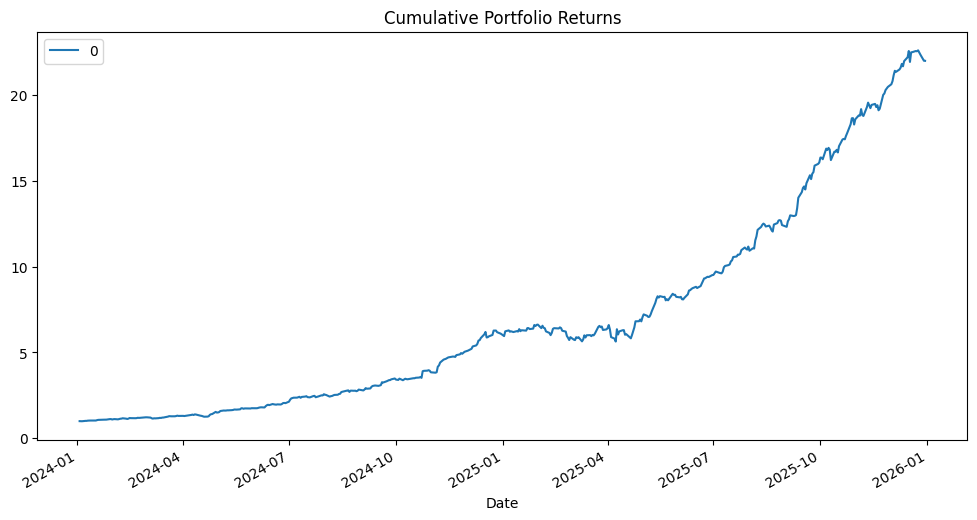

In [2]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(figsize=(12,6), title="Cumulative Portfolio Returns")
plt.show()


In [4]:
import pandas as pd
import numpy as np

# Load portfolio returns (make sure it's a single column)
portfolio_returns = pd.read_csv("../data/portfolio_returns.csv", index_col=0)

# If it has multiple columns, pick the first
portfolio_returns = portfolio_returns.iloc[:, 0]

portfolio_returns.index = pd.to_datetime(portfolio_returns.index)

# Daily Sharpe ratio
sharpe_ratio_daily = portfolio_returns.mean() / portfolio_returns.std()

# Annualized Sharpe ratio (252 trading days)
sharpe_ratio_annual = sharpe_ratio_daily * np.sqrt(252)

print(f"Daily Sharpe Ratio: {sharpe_ratio_daily:.4f}")
print(f"Annualized Sharpe Ratio: {sharpe_ratio_annual:.4f}")


Daily Sharpe Ratio: 0.3206
Annualized Sharpe Ratio: 5.0891


In [6]:
# If cumulative_returns is a DataFrame with one column, pick that column
cumulative_returns = cumulative_returns.iloc[:, 0]

# Compute rolling max and drawdown
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")


Maximum Drawdown: -14.92%


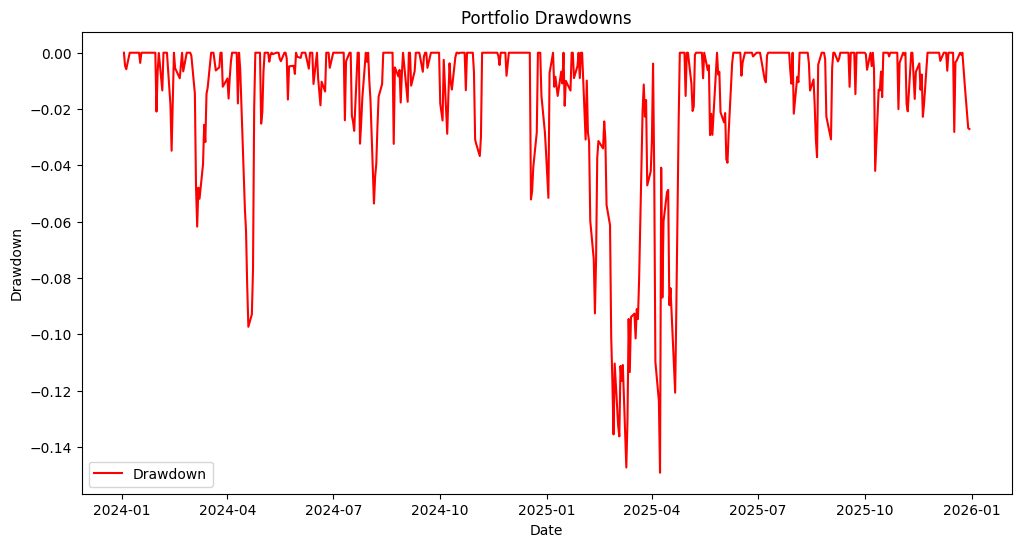

In [7]:
plt.figure(figsize=(12,6))
plt.plot(drawdown, color="red", label="Drawdown")
plt.title("Portfolio Drawdowns")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load final factor scores
final_scores = pd.read_csv("../data/final_factor_scores.csv", index_col=0)
final_scores.index = pd.to_datetime(final_scores.index)

# Load daily returns
daily_returns = pd.read_csv("../data/daily_returns.csv", index_col=0)
daily_returns.index = pd.to_datetime(daily_returns.index)

# Check first rows
final_scores.head()
daily_returns.head()



,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.007488,-0.000728,-0.040134
2024-01-04,-0.012700,-0.007178,-0.002181
2024-01-05,-0.004013,-0.000516,-0.001849
2024-01-08,0.024175,0.018871,0.012464
2024-01-09,-0.002263,0.002936,-0.022832


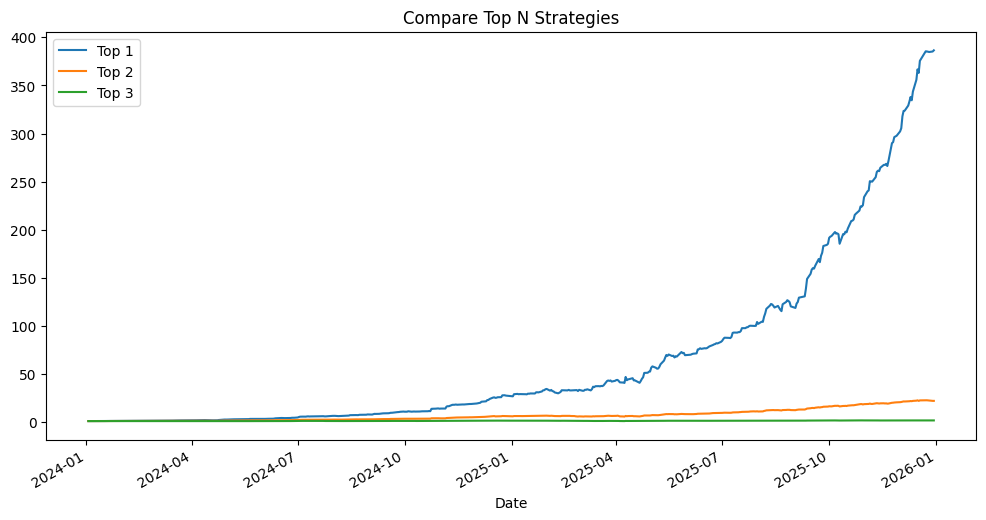

In [10]:
top_list = [1, 2, 3]  # top 1, 2, 3 stocks
cumulative_dict = {}

for n in top_list:
    top_stocks = final_scores.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
    portfolio = [daily_returns.loc[date, stocks].mean() for date, stocks in top_stocks.items()]
    cumulative_dict[f"Top {n}"] = (1 + pd.Series(portfolio, index=final_scores.index)).cumprod()

# Plot comparison
pd.DataFrame(cumulative_dict).plot(figsize=(12,6), title="Compare Top N Strategies")
plt.show()


In [12]:
cumulative_returns.to_csv("../data/cumulative_returns.csv")
drawdown.to_csv("../data/drawdown.csv")
